In [2]:
import json

notebook_file = "/home/ryounis/Documents/Zurich/PEACHLab/datascience-visualisation/data/datasets/Natural Language Processing with Disaster Tweets/classified_notebooks.json"
with open(notebook_file, 'r') as file:
    data = json.load(file)
LABELS = data["metadata"]["labels"]

In [10]:
import os
import sys; sys.path.insert(0, "../")
from Clusterers.clusterer import ClassCluster
from tqdm import tqdm

with open('../../../secrets/api_key.txt', 'r') as f: api_key = f'{f.read()}'

os.environ["OPENAI_API_KEY"] = api_key
clusterer = ClassCluster()
grouped_cells = {label: [] for label in LABELS}
for notebook in tqdm(data["notebooks"]):
    for cell in notebook["cells"]:
        cell["embedding"] = clusterer.embed_cell(cell["code"], cell["desc"])
        grouped_cells[cell["class"]].append(cell)
        
for label, cells in grouped_cells.items():
    print(f'{label}: {len(cells)}')

100%|██████████| 28/28 [02:08<00:00,  4.58s/it]


In [14]:
cells = grouped_cells["Data_Transform"]

In [15]:
import numpy as np

embeddings = np.array([cell["embedding"] for cell in cells])

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming `embeddings` is your high-dimensional data and `labels` are the cluster labels
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000)
tsne_results = tsne.fit_transform(embeddings)
tsne_results

/home/ryounis/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


array([[  4.0857234 , -16.727606  ],
       [ -1.1172178 ,  -7.8832874 ],
       [ -1.0749063 ,  -8.026155  ],
       [ 12.798102  ,  10.215103  ],
       [  9.232981  ,  13.3521385 ],
       [ 12.485811  ,   8.911947  ],
       [ -7.3579383 ,  -2.853171  ],
       [ 10.281273  ,  13.803681  ],
       [  7.357723  ,   9.666314  ],
       [ 13.441264  ,   4.6798253 ],
       [ -7.676941  ,  -0.14887218],
       [ -7.1159797 ,  -0.4228458 ],
       [ -4.9923887 ,  -6.386342  ],
       [ -2.7996569 ,  -8.523438  ],
       [ -4.9170218 ,  11.241538  ],
       [ 12.311888  ,   5.6647882 ],
       [  3.9335952 ,   1.2770455 ],
       [  0.6509042 ,  -9.399107  ],
       [  4.1904283 , -10.697909  ],
       [  5.614193  ,   3.108095  ],
       [  6.0995955 ,   7.749124  ],
       [  6.1776676 ,   7.716619  ],
       [ -1.2672657 ,  -6.294545  ],
       [  2.8921142 ,  -0.3857864 ],
       [ -0.69912016, -10.749013  ],
       [  5.809338  ,   9.095139  ],
       [  4.425037  ,  -7.8831973 ],
 

In [59]:
from sklearn.cluster import HDBSCAN
import numpy as np

clusterer = HDBSCAN(
    min_cluster_size=10,
    min_samples=2,
    cluster_selection_epsilon=.0,
    max_cluster_size=None,
    alpha=1
)

clusterer.fit(tsne_results)
labels = clusterer.labels_
for i, n in  enumerate(np.bincount([label+1 for label in labels])):
    print(f"Cluster {i-1}: {n}")

Cluster -1: 43
Cluster 0: 49
Cluster 1: 10
Cluster 2: 10
Cluster 3: 13
Cluster 4: 21
Cluster 5: 20
Cluster 6: 80


In [61]:
cluster_indices = np.where(labels == -1)[0]
cluster_points = tsne_results[cluster_indices]
clusterer.fit(cluster_points)
for i, n in  enumerate(np.bincount([label+1 for label in clusterer.labels_])):
    print(f"Cluster {i-1}: {n}")
    

Cluster -1: 0
Cluster 0: 26
Cluster 1: 17


In [65]:
from Clusterers.title_generator import TitleGenerator

title_generator = TitleGenerator()
descs = [cell["desc"] for cell in cells]
titles = title_generator.generate_titles_from_descs(labels, descs)
titles

{'0': 'Text Preprocessing for Machine Learning Models',
 '1': 'Natural Language Processing with Python',
 '2': 'TensorFlow Dataset Preparation and Management',
 '3': 'Text Preprocessing and Cleaning Techniques',
 '4': 'Text Preprocessing and Feature Engineering Techniques',
 '5': 'Comprehensive Text Preprocessing and Feature Engineering',
 '6': 'Text Data Cleaning and Vectorization Techniques',
 '-1': 'Text Data Preprocessing and Analysis'}

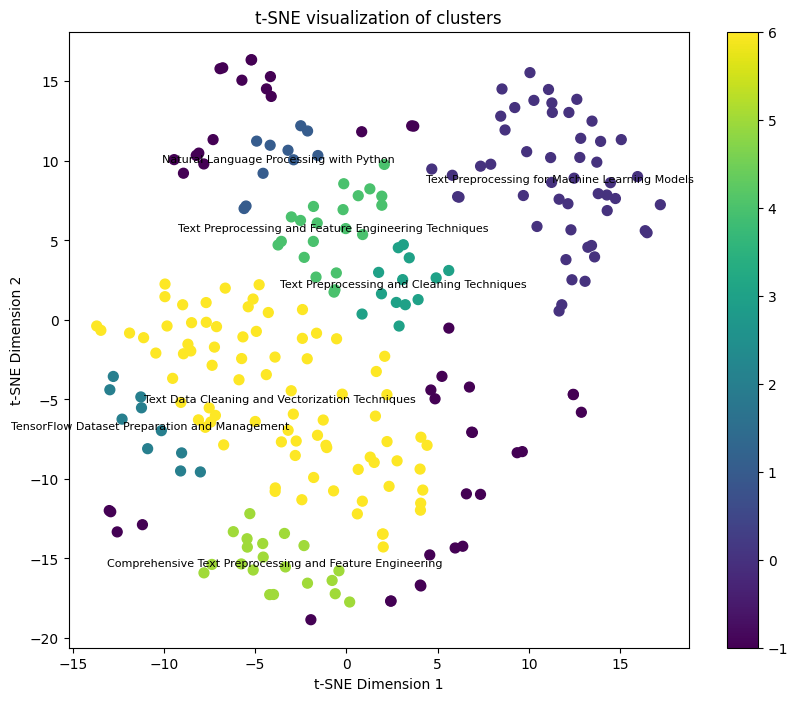

In [67]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar()
plt.title('t-SNE visualization of clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add titles for each cluster
for i, label in enumerate(np.unique(labels)):
    if label != -1:
        plt.text(tsne_results[labels == label, 0].mean(), tsne_results[labels == label, 1].mean(), titles[str(label)], fontsize=8, ha='center', va='center')

plt.show()

In [68]:
import pandas as pd

# Create a list to store the data
data = []

# Iterate over the cells
for i, cell in enumerate(cells):
    # Get the code, description, cluster, and title
    code = cell["code"]
    desc = cell["desc"]
    cluster = labels[i]
    title = titles[str(labels[i])]

    # Append the data to the list
    data.append([code, desc, cluster, title])

# Create the dataframe
df = pd.DataFrame(data, columns=["Code", "Description", "Cluster", "Title"])
df

,Code,Description,Cluster,Title
0,"train_df = train_df.drop(columns=[""id"", ""keywo...","This code snippet drops the ""id"", ""keyword"", a...",-1,Text Data Preprocessing and Analysis
1,def remove_URL(text):\n url = re.compile(r'...,This code snippet defines a function to remove...,6,Text Data Cleaning and Vectorization Techniques
2,def remove_html(text):\n html=re.compile(r'...,This code snippet defines a function to remove...,6,Text Data Cleaning and Vectorization Techniques
3,def remove_emoji(text):\n emoji_pattern = r...,This code snippet defines a function to remove...,0,Text Preprocessing for Machine Learning Models
4,"train_tensor = tokenizer(list(train_df[""text""]...",This code snippet tokenizes the text data from...,0,Text Preprocessing for Machine Learning Models
...,...,...,...,...
241,word2vec_X = X[0:train_data.shape[0]]\ny = dat...,This code snippet splits the array `X` back in...,0,Text Preprocessing for Machine Learning Models
242,tokenizer = Tokenizer()\ntokenizer.fit_on_text...,This code snippet tokenizes the texts in `data...,6,Text Data Cleaning and Vectorization Techniques
243,trainCNN_data = cnn_data[0:train_data.shape[0]...,This code snippet splits the CNN-ready data an...,0,Text Preprocessing for Machine Learning Models
244,embedding_matrix = np.zeros((len(word_index) +...,This code snippet initializes an embedding mat...,6,Text Data Cleaning and Vectorization Techniques
